# Final Project Submission

Please fill out:
* Student name: MARY WAIRIMU
* Student pace:  full time
* Scheduled project review date/time:  MARCH 2023
* Instructor name: WILLIAM OKOMBA
* Blog post URL:


# Your code here - remember to use markdown cells for comments as well!
Involves importing various libraries to help me work with the data. it has the pandas, csv, and the numpy and matplotlib for 
the visualisation
 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# loading the moviegross csv to work with as a df
df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [5]:
df.head(100)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
95,Secretariat,BV,59700000.0,537000,2010
96,The Ghost Writer,Sum.,15500000.0,44700000,2010
97,Morning Glory,Par.,31000000.0,29000000,2010
98,Remember Me,Sum.,19100000.0,37000000,2010


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


NOW WE WILL START WITH THE STUDIO COLUMN AND IDENTIFY THE MISSING VALUES.
: considering the studios all have diffrent names like the BV,WB its right if we do not assume any values
  and replace them. Thus its better to drop the empty/null rows

In [4]:
df.isnull().sum().sum()

1383

In [5]:
df=df.dropna()

In [6]:
df.isnull().sum(). any()

False

In [7]:
df.dropna(subset=["studio"], inplace=True)

C:\Users\Nima\AppData\Local\Temp\ipykernel_7044\1090852281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=["studio"], inplace=True)


In [8]:
df.duplicated().sum()

0

Now there should be no missing values in the studio column:

In [9]:
assert df["studio"].isna().sum() == 0

WE CAN ALSO LOOK AT ALTERNATIVE MEANS OF HANDLING THE MISSING DATA
eg REPLACING WITH THE MEDIAN

mean      4.701984e+07
median    1.670000e+07
std       8.162689e+07
Name: domestic_gross, dtype: float64


<AxesSubplot:>

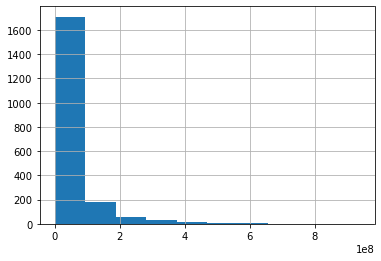

In [10]:
# for the domestic_gross original statistics
print(df['domestic_gross'].apply(['mean', 'median', 'std']))
df['domestic_gross'].hist()

mean      4.701984e+07
median    1.670000e+07
std       8.162689e+07
Name: domestic_gross, dtype: float64


<AxesSubplot:>

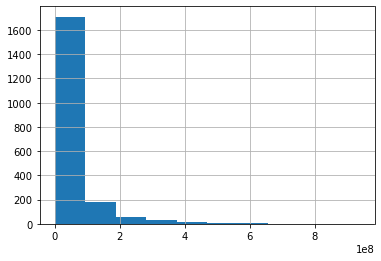

In [11]:
# on filling in with the median(middle most number)
domestic_and_median = df['domestic_gross'].fillna(value=df['domestic_gross'].median())
print(domestic_and_median.apply(['mean', 'median', 'std']))
domestic_and_median.hist()

In [12]:
df.info()
# Now we have the studio column ready to work with

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


# now let's start our data analysis : 

## BETWEEN THE FOREIGN GROSS AND DOMESTIC GROSS WHICH HAS BETTER RESULTS???

<AxesSubplot:xlabel='year'>

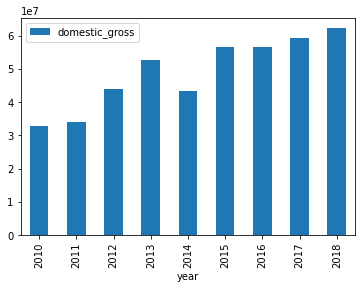

In [14]:
df[['year','domestic_gross']].groupby('year').mean().plot(kind='bar')


In [12]:
df['foreign_gross'] = pd. to_numeric(df['foreign_gross'])

In [11]:
df[['foreign_gross']] = df[['foreign_gross']].apply(pd.to_numeric, errors='coerce')


<AxesSubplot:ylabel='year'>

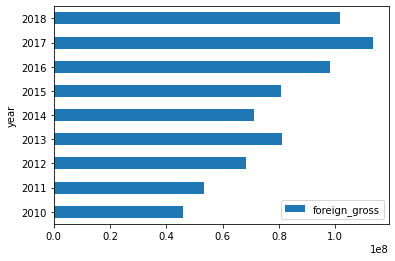

In [26]:
df[['year','foreign_gross']].groupby('year').mean().plot(kind='barh')

Text(0.5, 1.0, 'Relationship Between The foreign and domestic gross returns')

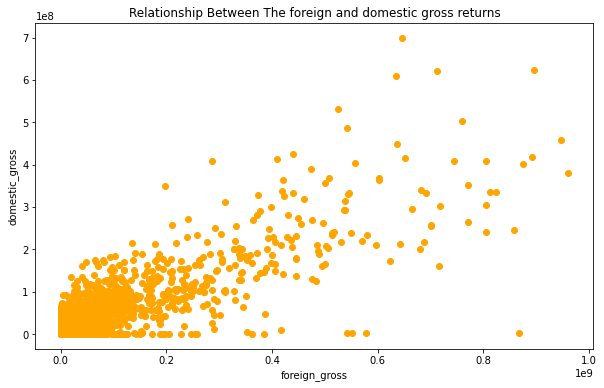

In [30]:
# want to try with foreign gross
foreign_domestic_figure, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['foreign_gross'],df['domestic_gross'],color= 'orange')
ax.set_xlabel('foreign_gross')
ax.set_ylabel('domestic_gross')
ax.set_title('Relationship Between The foreign and domestic gross returns')

# The distribution of movies by studios

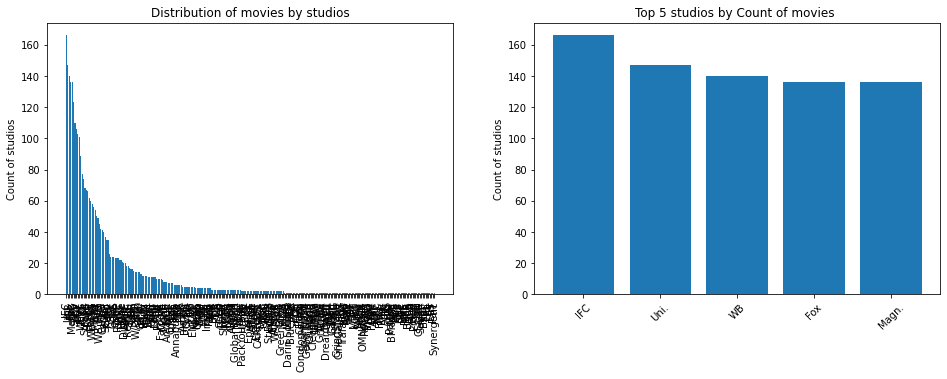

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Create variables for easier reuse
value_counts = df["studio"].value_counts()
top_5_counts = value_counts.iloc[:5]

# Plot data
ax1.bar(value_counts.index, value_counts.values)
ax2.bar(top_5_counts.index, top_5_counts.values)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=45)
ax1.set_ylabel("Count of studios")
ax2.set_ylabel("Count of studios")
ax1.set_title("Distribution of movies by studios")
ax2.set_title("Top 5 studios by Count of movies ");

<Figure size 432x288 with 0 Axes>

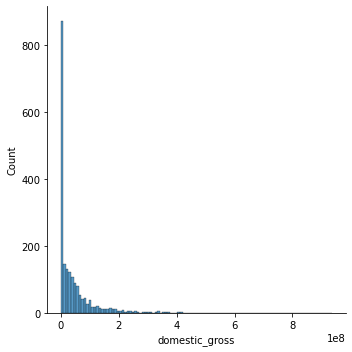

In [35]:
plt.figure(figsize = (6, 4))
sns.displot(df.domestic_gross);

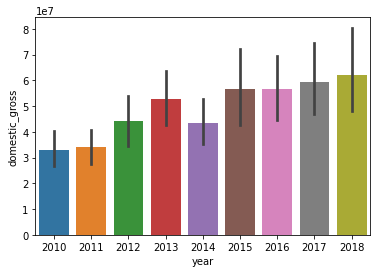

In [34]:
sns.barplot(x="year", y="domestic_gross", data=df)
plt.show()

# Now let's work with the tmdb dataframe

In [36]:
tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz',index_col=0)
tmdb_df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [38]:
# In order to know on where to tidy and clean but it seems all good as no missing values
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


THE tmdb.movies.csv.gz file has no missing values . Thus cleaned data to work with
NOTE : we have used the index_col =0 so as to remove the unnamed col

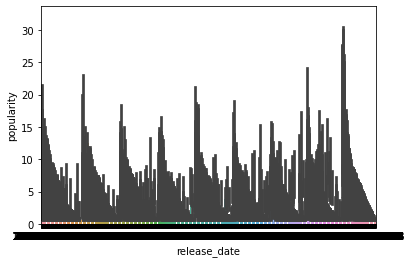

In [39]:
sns.barplot(x="release_date", y="popularity", data=tmdb_df)
plt.show()

# working with the tn budget 

In [40]:
df_tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [42]:
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The movie_budgets.csv has no missing values thus ready for analysis and visualisation . But not going to work with it
for the time being.

# Now let's work with the im.db database

we first import libraries that will be of help to our data

In [19]:
import sqlite3 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


IN Order to connect to our im.db database

In [20]:
conn=sqlite3.connect('zippedData/im.db')
cursor = conn.cursor()


In [21]:
# To load our table names from the database
table_name_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""

pd.read_sql(table_name_query, conn)


,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [45]:
pd.read_sql("SELECT * FROM movie_basics;", conn)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [46]:
# To change our data into a df in order to tidy it up later
df1=pd.read_sql("SELECT * FROM movie_basics;", conn)
df1

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [47]:
df2=pd.read_sql("SELECT * FROM movie_ratings;", conn)
df2.head(100)
# Also limiting to our first ten so as to ease the plotting

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
95,tt1515069,8.3,15
96,tt1515208,6.3,1447
97,tt1516577,5.3,147
98,tt1516595,4.4,64


To check of any outliers in the data

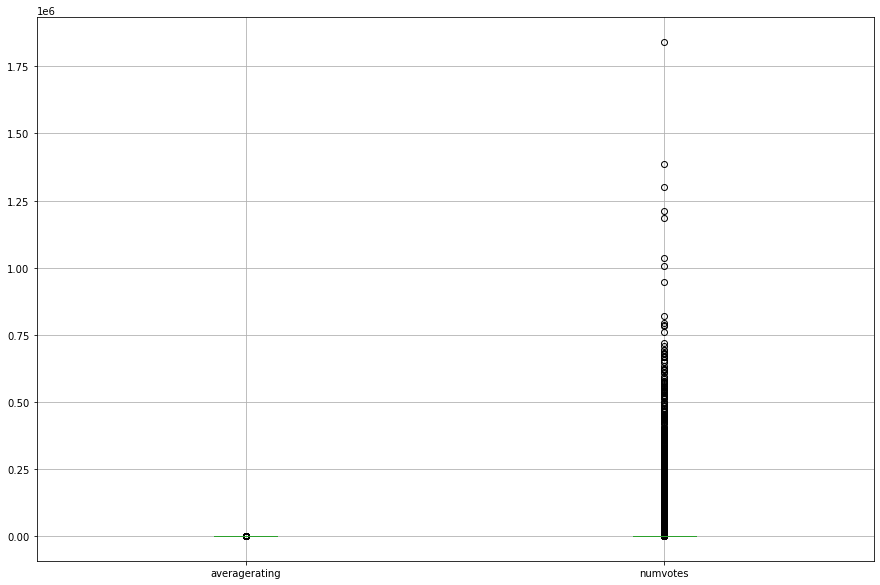

In [49]:
plt.figure(figsize = (15, 10))
df2.boxplot()
plt.show()

In [50]:
# to identify the missing data
df1.isnull().sum().sum()

37168

In [51]:
# To drop the missing values
df1=df1.dropna()
# To confirm on having dropped them
df1.isnull().sum(). any()

False

NOW LET'S START OUR ANALYSIS AND PLOTTINGS 

In [52]:
genres_df = df1[df1['genres'].isin(['Action','Crime'])]
genres_df.tail() 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
145599,tt9844102,Ray,Ray,2018,111.0,Crime
145613,tt9844944,Exit Point,Exit Point,2019,96.0,Action
145669,tt9853118,KYrYoyekh,KYrYoyekh,2014,78.0,Crime
145700,tt9856484,The Hunt,The Hunt,2019,90.0,Crime
145866,tt9879042,Saudades do futuro,Saudades do futuro,2018,45.0,Crime


# Which genres produce best and have best returns?
In order for microsoft to yield better they need to know the trend of various genres of movies and which is best 


In [53]:
q = """
SELECT averagerating AS AR, genres,start_year as year
FROM movie_ratings as r
JOIN movie_basics as b
    ON r.movie_id = b . movie_id
GROUP BY year    
ORDER BY year   
;"""
df_genres = pd.read_sql(q, conn)
df_genres





,AR,genres,year
0,6.4,Drama,2010
1,6.5,"Mystery,Thriller",2011
2,7.2,"Action,Comedy,Crime",2012
3,5.1,Comedy,2013
4,4.2,"Action,Adventure,Fantasy",2014
5,5.0,"Adventure,Animation,Comedy",2015
6,4.2,"Action,Adventure,Sci-Fi",2016
7,8.2,"Documentary,Drama",2017
8,5.9,Documentary,2018
9,8.3,Romance,2019


Text(0, 0.5, 'Average ratings')

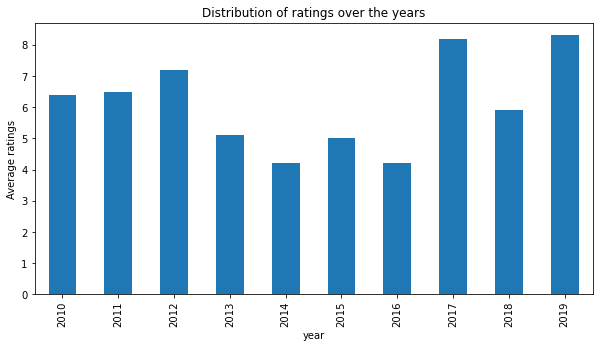

In [54]:
fig,axes = plt.subplots(nrows=1,figsize=(10,5))
df_genres.set_index('year')['AR'].plot(kind='bar',stacked=True)
# ax = df_genres.plot(kind='bar', stacked=True, figsize=(12, 6))
axes.set_title('Distribution of ratings over the years')
axes.set_ylabel('Average ratings')

In [84]:
q = """
SELECT averagerating AS AR, genres,start_year as year
FROM movie_ratings as r
JOIN movie_basics as b
    ON r.movie_id = b . movie_id
WHERE genres = 'Documentary'    
GROUP BY year    
ORDER BY year   
;"""
df_Documentary = pd.read_sql(q, conn)
df_Documentary

,AR,genres,year
0,7.5,Documentary,2010
1,8.7,Documentary,2011
2,7.8,Documentary,2012
3,7.6,Documentary,2013
4,6.9,Documentary,2014
5,5.8,Documentary,2015
6,9.0,Documentary,2016
7,7.2,Documentary,2017
8,7.5,Documentary,2018
9,7.4,Documentary,2019


Text(0, 0.5, 'Average ratings')

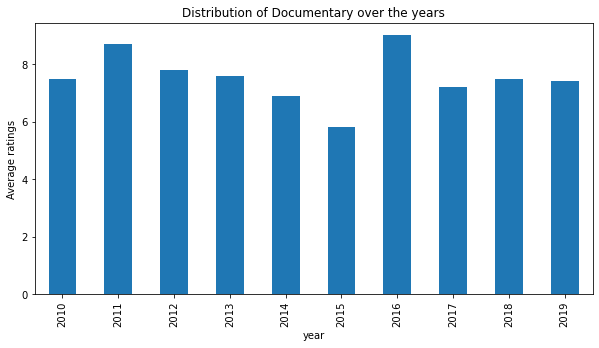

In [85]:
fig,axes = plt.subplots(nrows=1,figsize=(10,5))
df_Documentary.set_index('year')['AR'].plot(kind='bar',stacked=True)
# ax = df_genres.plot(kind='bar', stacked=True, figsize=(12, 6))
axes.set_title('Distribution of Documentary over the years')
axes.set_ylabel('Average ratings')

In [73]:
q = """
SELECT averagerating AS AR, genres,start_year as year
FROM movie_ratings as r
JOIN movie_basics as b
    ON r.movie_id = b . movie_id
WHERE genres = 'Drama'    
GROUP BY year    
ORDER BY year   
;"""
df_Drama = pd.read_sql(q, conn)
df_Drama

,AR,genres,year
0,6.8,Drama,2010
1,8.6,Drama,2011
2,7.6,Drama,2012
3,6.8,Drama,2013
4,6.2,Drama,2014
5,6.9,Drama,2015
6,4.0,Drama,2016
7,6.3,Drama,2017
8,6.9,Drama,2018
9,7.1,Drama,2019


Text(0, 0.5, 'Average ratings')

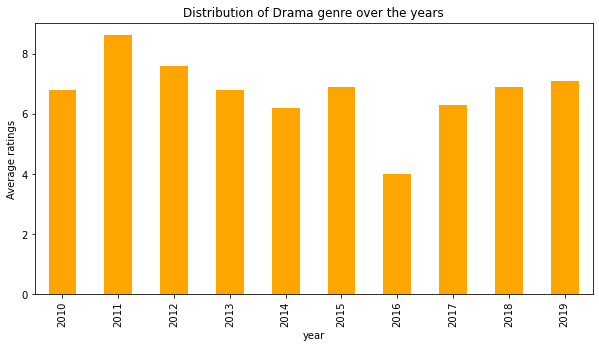

In [81]:
fig,axes = plt.subplots(nrows=1,figsize=(10,5))
df_Drama.set_index('year')['AR'].plot(kind='bar',color= 'orange' ,stacked=True)
# ax = df_genres.plot(kind='bar', stacked=True, figsize=(12, 6))
axes.set_title('Distribution of Drama genre over the years')
axes.set_ylabel('Average ratings')

Text(0.5, 1.0, 'Relationship Between The average ratings and num of votes')

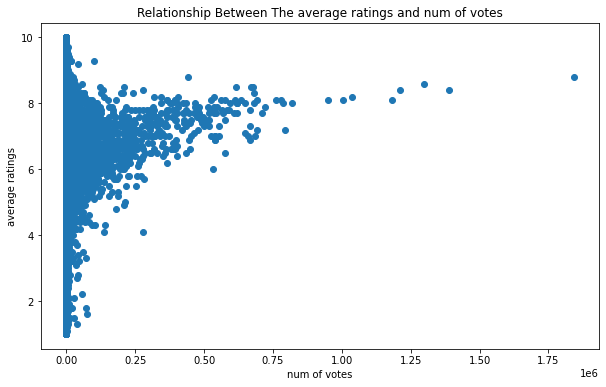

In [63]:
numvotes_figure, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df2['numvotes'],df2['averagerating'])
ax.set_xlabel('num of votes')
ax.set_ylabel('average ratings')
ax.set_title('Relationship Between The average ratings and num of votes')

In [55]:
gen_trend = """SELECT m.start_year AS Year, m.genres AS Genre, MAX(r.averagerating) AS Rating
FROM movie_basics m
INNER JOIN movie_ratings r
ON m.movie_id = r.movie_id
GROUP BY Year
ORDER BY Year DESC, Rating DESC;
"""
dfg=pd.read_sql(gen_trend, conn)
dfg

,Year,Genre,Rating
0,2019,Documentary,10.0
1,2018,Documentary,10.0
2,2017,Drama,10.0
3,2016,Documentary,10.0
4,2015,Documentary,10.0
5,2014,"Biography,Documentary,Drama",9.8
6,2013,"Biography,Documentary,Music",9.8
7,2012,Documentary,10.0
8,2011,"Comedy,Documentary,Drama",9.4
9,2010,"Crime,Documentary",10.0


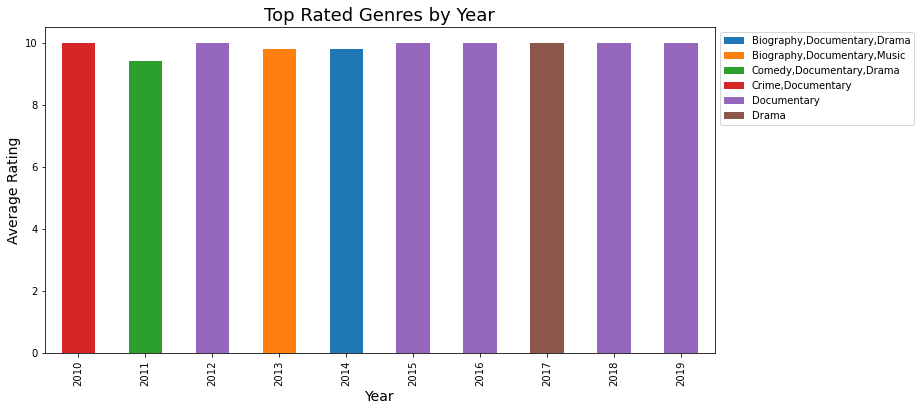

In [56]:
dfg = pd.read_sql(gen_trend, conn)
df_pivot = dfg.pivot(index='Year', columns='Genre', values='Rating')
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
ax.set_title('Top Rated Genres by Year', fontsize=18)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Average Rating', fontsize=14)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Show the plot


In [22]:
q="""
SELECT *
  FROM movie_ratings
  WHERE averagerating BETWEEN 1 AND 4
GROUP BY numvotes
LIMIT 100
;"""
df_ratings_below_5=pd.read_sql(q,conn)
df_ratings_below_5

,movie_id,averagerating,numvotes
0,tt1736000,1.4,5
1,tt7278838,2.7,6
2,tt1772275,3.6,7
3,tt1587107,4.0,8
4,tt1426379,3.8,9
...,...,...,...
95,tt3718066,3.5,100
96,tt2334350,3.4,101
97,tt1478277,2.6,102
98,tt1474456,3.2,103


In [24]:
q="""
SELECT *
  FROM movie_ratings
  WHERE averagerating BETWEEN 5 AND 10
GROUP BY numvotes
LIMIT 100
;"""
df_rating_above_5 = pd.read_sql(q, conn)
df_rating_above_5

,movie_id,averagerating,numvotes
0,tt1193623,8.0,5
1,tt1204784,5.8,6
2,tt1346690,7.7,7
3,tt1327602,7.8,8
4,tt1527723,7.3,9
...,...,...,...
95,tt1583743,7.3,100
96,tt1323962,5.1,101
97,tt1494611,7.3,102
98,tt1478965,5.6,103


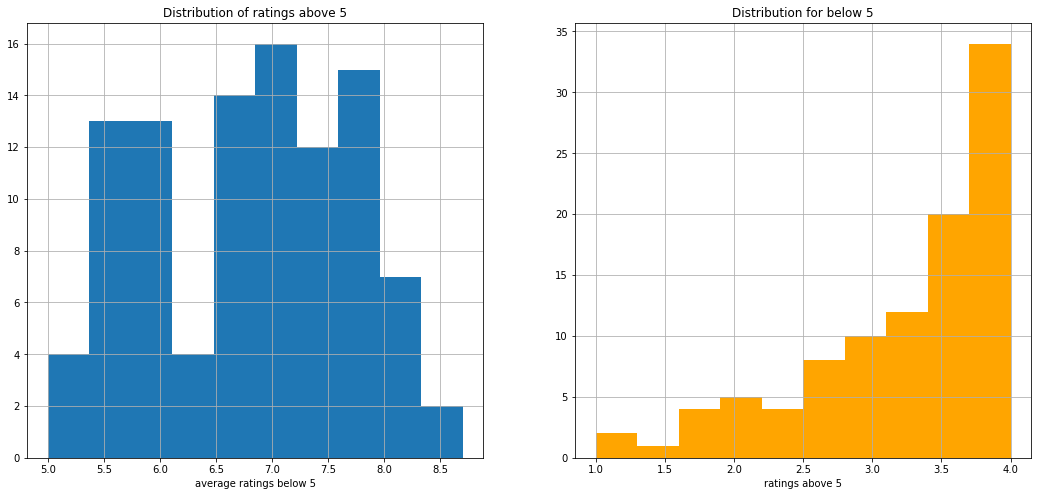

In [25]:
fig , axes = plt.subplots(ncols=2,nrows=1,figsize=(18,8))
ax_lft = axes[0]
df_rating_above_5['averagerating'].hist(ax=ax_lft)
ax_lft.set_title('Distribution of ratings above 5')
ax_lft.set_xlabel('average ratings below 5');
ax_right = axes[1]
df_ratings_below_5['averagerating'].hist(ax=ax_right,color='orange')
ax_right.set_title('Distribution for below 5')
ax_right.set_xlabel('ratings above 5');